In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("C:\\Users\\Danish private\\OneDrive\\Documents\\ml assets files\\all_currencies.csv\\all_currencies.csv")

In [5]:
df.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [6]:
df.isnull().sum()

Unnamed: 0        0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume         5335
Market Cap    64377
dtype: int64

In [10]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632218 entries, 0 to 632217
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  632218 non-null  int64  
 1   Date        632218 non-null  object 
 2   Symbol      632218 non-null  object 
 3   Open        632218 non-null  float64
 4   High        632218 non-null  float64
 5   Low         632218 non-null  float64
 6   Close       632218 non-null  float64
 7   Volume      626883 non-null  float64
 8   Market Cap  567841 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 43.4+ MB


((632218, 9), None)

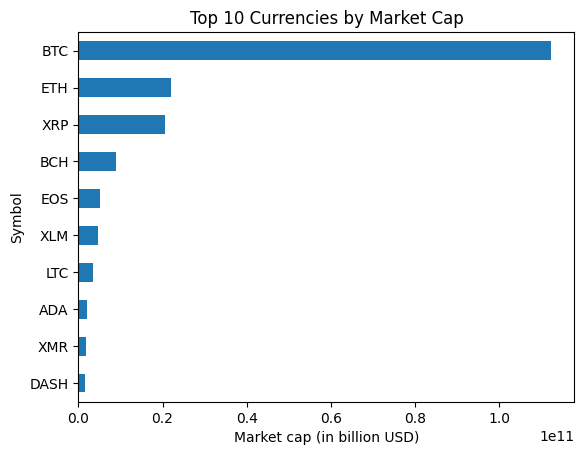

In [11]:
ax = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

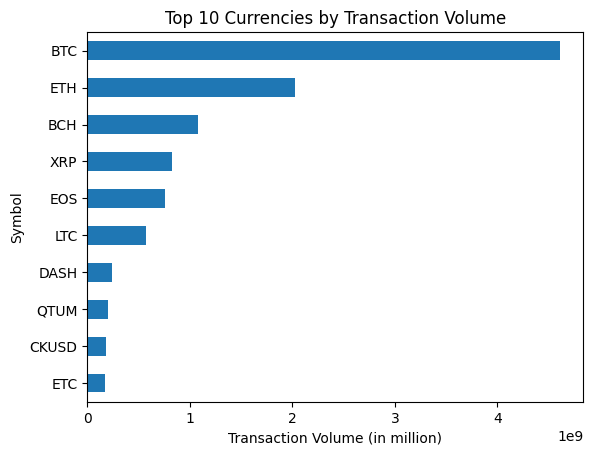

In [12]:
ax = df.groupby(['Symbol'])['Volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [13]:
top_5_currency_names = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df[df['Symbol'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
51223,0,2017-07-23,BCH,555.89,578.97,411.78,413.06,85013.0,NaN
51224,1,2017-07-24,BCH,412.58,578.89,409.21,440.70,190952.0,NaN
51225,2,2017-07-25,BCH,441.35,541.66,338.09,406.90,524908.0,NaN
51226,3,2017-07-26,BCH,407.08,486.16,321.79,365.82,1784640.0,NaN
51227,4,2017-07-27,BCH,417.10,460.97,367.78,385.48,533207.0,NaN


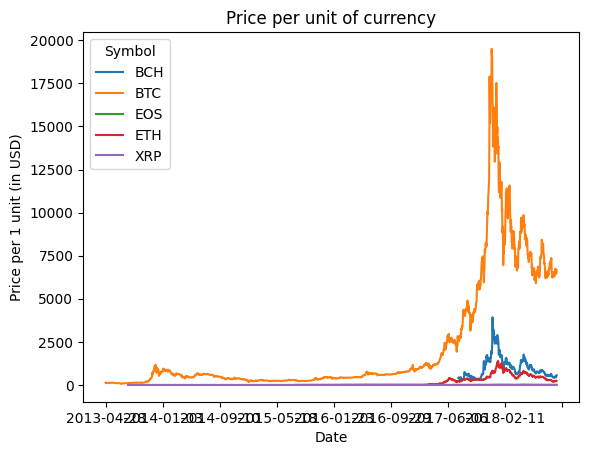

In [14]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");


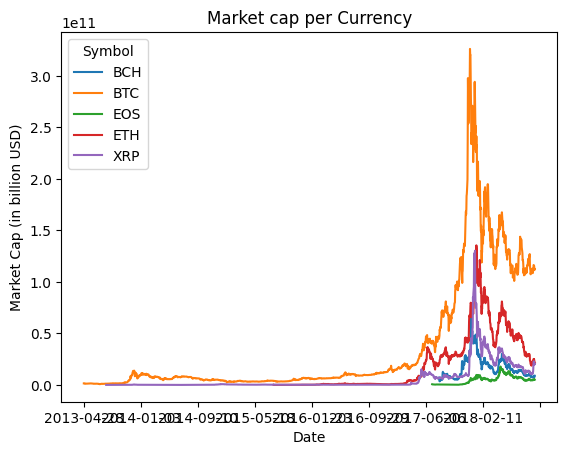

In [15]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Market Cap'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency");

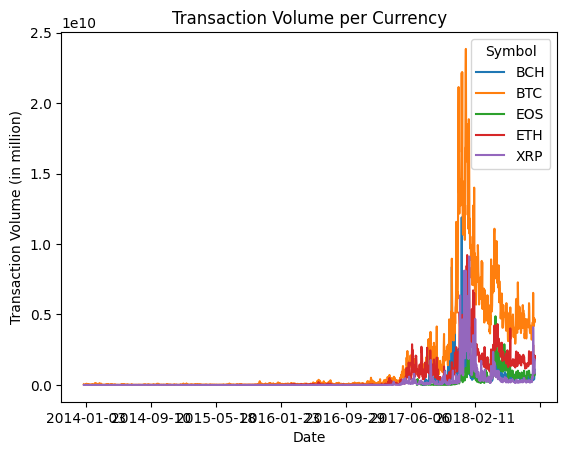

In [16]:
ax = data_top_5_currencies.groupby(['Date', 'Symbol'])['Volume'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency");

<AxesSubplot: >

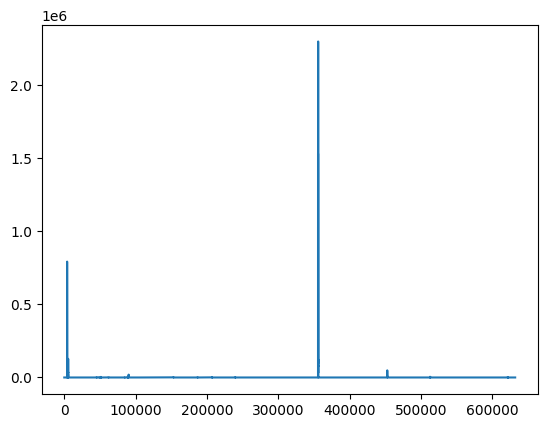

In [17]:
%matplotlib inline
df['Close'].plot()

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

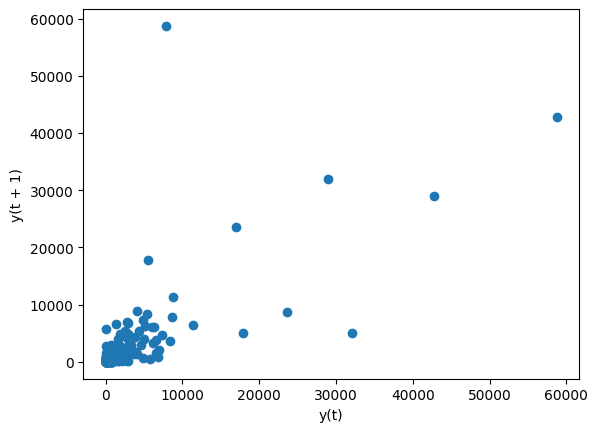

In [19]:
from pandas.plotting import lag_plot

lag_plot(df['Volume'].tail(250))

In [30]:
df_BTC = df.loc[df['Symbol'] == 'BTC',['Close']]
df_BTC.shape

(1979, 1)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_BTC)

In [35]:
df_BTC.index = pd.to_datetime(df_BTC.index)
train = df_BTC[:'2018'].values
valid = df_BTC['2018':].values

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_BTC)

In [37]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [39]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [40]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=1)

Epoch 1/2
1919/1919 [==============================] - 69s 32ms/step - loss: 0.0021
Epoch 2/2
1919/1919 [==============================] - 62s 32ms/step - loss: 8.7656e-04
